# Business Data Analytics and Prediction

## Group no. 4 - Housing Prices


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew 

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Turn off warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Used for development stages
DEBUG_MODE = True

In [4]:
#Eilon - used for development stage - I need to set my working directory manually
EILON_SET_WORK_DIR = False
if (EILON_SET_WORK_DIR):
# Now change the directory
    import os
    os.chdir("C:/Users/bareilon/Documents/Personal/MBA/IDC BIG DATA/Mini Semester 1/Business Data Analytics/exercises/IDC-BDA-Exercises")

### 1. Business objectives and targets

#### Business objective: 


### 2. Read, explore and prepare data

#### 2.1. Download and read the data

The dataset is taken from a Kaggle competition: <br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Read the csv file to a data frame. Note that the data is already split to train and test files.

In [5]:
df = pd.read_csv("Data/train.csv")

#### 2.2. Taking a quick look at the data 
Using the functions: 
* head
* info 
* describe


1. The prediction target (y) is the SalePrice column.
2. We will handle some missing data

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train = pd.read_csv("Data/train.csv")
train_len = df_train.shape[0]
df_test = pd.read_csv("Data/test.csv")
df_test["SalePrice"] = 0 
df_merged = df_train.append(df_test)

In [8]:
df_merged.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,90491.588215
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,106496.379333
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,34900.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,163000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


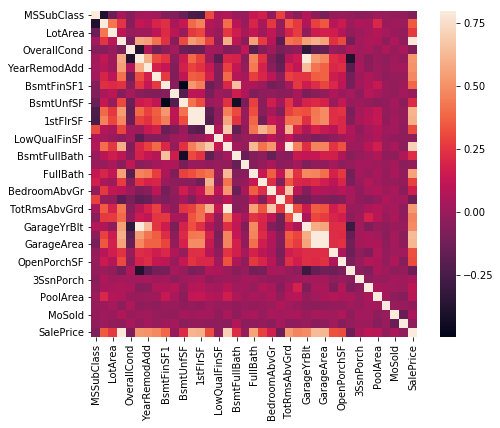

In [9]:
corr_mat = df_train[df_train.select_dtypes(exclude='object').columns]
corr_mat = corr_mat.drop('Id', axis=1)
corr_mat = corr_mat.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_mat, vmax=.8, square=True)

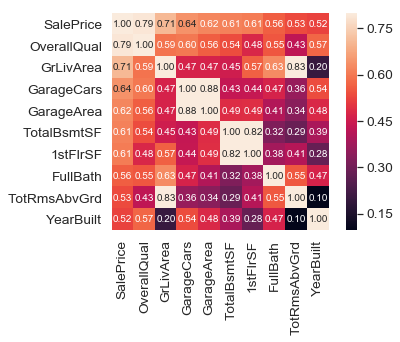

In [10]:
# Top 10 Correlations
n = 10 #number of variables for heatmap
cols = corr_mat.nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': n}, yticklabels=cols.values, xticklabels=cols.values, vmax=.8)
plt.show()

### Fill in missing values

In [11]:
# Find all columns with missing values
def get_null_list():
    _null_list = df_merged.isna().sum()
    _null_list = _null_list[_null_list > 0].sort_values(ascending=False)
    return _null_list

null_list = get_null_list()
null_list.head(15)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
dtype: int64

### Variable: PoolQC
If the Pool Area is 0, then the Pool QC is 'NA', as described in the Data Description file

In [12]:
idx = (df_merged.PoolArea == 0) & (df_merged.PoolQC.isna() == True)
df_merged.loc[idx, 'PoolQC'] = df_merged.loc[idx, 'PoolQC'].fillna('NA')

#### But we still have 3 outliers. Houses with pools but the qaulity is missing.

In [13]:
df_merged[(df_merged.PoolQC.isna() == True) & (df_merged.PoolArea > 0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
960,2421,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,...,368,NaN,GdPrv,NaN,0,2,2007,WD,Normal,0
1043,2504,50,RL,104.0,23920,Pave,NaN,Reg,Lvl,AllPub,...,444,NaN,NaN,NaN,0,4,2007,WD,Normal,0
1139,2600,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,AllPub,...,561,NaN,GdPrv,NaN,0,6,2007,WD,Normal,0


In [14]:
df_merged.PoolQC.value_counts()

NA    2906
Ex       4
Gd       4
Fa       2
Name: PoolQC, dtype: int64

Let's take a look at the data of the houses wit the pools but no quality grading.
We'll review these features: Overall Condition, External Condition, Garage Condition, Heating Quality etc. 

In [15]:
qc_cols = ['OverallCond','ExterCond','ExterQual','GarageCond','GarageQual','HeatingQC','FireplaceQu','KitchenQual','BsmtFinType1','BsmtFinType2','Fence','PoolQC']
df_merged[qc_cols][(df_merged.PoolQC.isna() == True) & (df_merged.PoolArea > 0)]

,OverallCond,ExterCond,ExterQual,GarageCond,GarageQual,HeatingQC,FireplaceQu,KitchenQual,BsmtFinType1,BsmtFinType2,Fence,PoolQC
960,6,TA,TA,TA,TA,Gd,Fa,TA,BLQ,Rec,GdPrv,NaN
1043,5,TA,TA,TA,TA,Ex,Po,Gd,Unf,Unf,NaN,NaN
1139,5,TA,TA,TA,TA,Ex,NaN,TA,NaN,NaN,GdPrv,NaN


We will assume the quality is Typical/Average (TA), basd on the other parameters. <br>
If there was a lot of data about houses with pools, we could build a model to predict this variable based on other quality fators. 

In [16]:
idx = (df_merged.PoolQC.isna() == True) & (df_merged.PoolArea > 0)
df_merged.loc[idx, 'PoolQC'] = df_merged.loc[idx, 'PoolQC'].fillna('TA')
df_merged.loc[idx]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
960,2421,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,...,368,TA,GdPrv,NaN,0,2,2007,WD,Normal,0
1043,2504,50,RL,104.0,23920,Pave,NaN,Reg,Lvl,AllPub,...,444,TA,NaN,NaN,0,4,2007,WD,Normal,0
1139,2600,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,AllPub,...,561,TA,GdPrv,NaN,0,6,2007,WD,Normal,0


In [17]:
df_merged.PoolQC.value_counts()

NA    2906
Ex       4
Gd       4
TA       3
Fa       2
Name: PoolQC, dtype: int64

In [18]:
df_merged.PoolQC.count()

2919

### 'MiscFeature' Column 

Let's overview the 'MiscFeature' column
According to the data description:
MiscFeature: Miscellaneous feature not covered in other categories

In [19]:
df_merged.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

We will fill in all the null values with 'NA'.

In [20]:
idx = df_merged.MiscFeature.isna()
df_merged.loc[idx, 'MiscFeature'] = df_merged.loc[idx, 'MiscFeature'].fillna('NA')
df_merged[idx].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NA,NaN,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NA,NaN,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NA,NaN,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NA,NaN,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NA,NaN,NA,0,12,2008,WD,Normal,250000


But wait, let's check of there is a house with a Miscellaneous Value greater then 0 that we wrongly labeled 'MiscFeature' as 'NA'

In [21]:
idx = (df_merged.MiscFeature == 'NA') & (df_merged.MiscVal > 0)
df_merged[idx]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1089,2550,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NA,NaN,NA,17000,10,2007,New,Partial,0


There is one house that we missslabeled. Without other info, we will set it to "Other"

In [22]:
df_merged.loc[idx, 'MiscFeature'] = 'Othr'
df_merged[idx]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1089,2550,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NA,NaN,Othr,17000,10,2007,New,Partial,0


In [23]:
df_merged.MiscFeature.value_counts()

NA      2813
Shed      95
Gar2       5
Othr       5
TenC       1
Name: MiscFeature, dtype: int64

In [24]:
df_merged.MiscFeature.count()

2919

### Fence Column

In [25]:
df_merged.Fence.value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [26]:
idx = df_merged.Fence.isna()
df_merged.loc[idx, 'Fence'] = df_merged.loc[idx, 'Fence'].fillna('NA')
df_merged[idx].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [27]:
df_merged.Fence.value_counts()

NA       2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

#### Alley Column

In [28]:
df_merged.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [29]:
idx = df_merged.Alley.isna()
df_merged.loc[idx, 'Alley'] = df_merged.loc[idx, 'Alley'].fillna('NA')
df_merged[idx].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [30]:
df_merged.Alley.value_counts()

NA      2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

### 'FireplaceQu' Column

In [31]:
df_merged.FireplaceQu.value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [32]:
col = 'FireplaceQu'
idx = df_merged[col].isna()
df_merged.loc[idx, col] = df_merged.loc[idx, col].fillna('NA')
df_merged[idx].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
10,11,20,RL,70.0,11200,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,129500
12,13,20,RL,NaN,12968,Pave,NA,IR2,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,144000
15,16,45,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,NA,0,7,2007,WD,Normal,132000


In [33]:
df_merged.FireplaceQu.value_counts()

NA    1420
Gd     744
TA     592
Fa      74
Po      46
Ex      43
Name: FireplaceQu, dtype: int64

Let's check if we miss labeled:

In [34]:
df_merged[(df_merged.Fireplaces > 0) & (df_merged.FireplaceQu == 'NA')]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


we're good...

### Garage relaed columns

In [35]:
# Get all the columns related to Garages 
cols = df_merged.filter(regex='Garage').columns
cols = cols.values
cols

array(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond'], dtype=object)

In [36]:
# Find indexes of homes without garages
idx = df_merged[(df_merged.GarageType.isna()) & (df_merged.GarageYrBlt.isna()) & (df_merged.GarageFinish.isna()) & \
                (df_merged.GarageCars == 0)   & (df_merged.GarageArea == 0)    & (df_merged.GarageQual.isna())   & \
                (df_merged.GarageCond.isna()) ].index

In [37]:
# Fill in missing values
df_merged.loc[idx, 'GarageType'] = df_merged.loc[idx, 'GarageType'].fillna('NA')
df_merged.loc[idx, 'GarageFinish'] = df_merged.loc[idx, 'GarageFinish'].fillna('NA')
df_merged.loc[idx, 'GarageQual'] = df_merged.loc[idx, 'GarageQual'].fillna('NA')
df_merged.loc[idx, 'GarageCond'] = df_merged.loc[idx, 'GarageCond'].fillna('NA')
df_merged.loc[idx, 'GarageYrBlt'] = df_merged.loc[idx, 'GarageYrBlt'].fillna(0)

In [38]:
null_list = df_merged[cols].isna().sum()
null_list[null_list > 0].sort_values(ascending=False)

GarageCond      2
GarageQual      2
GarageFinish    2
GarageYrBlt     2
GarageArea      1
GarageCars      1
dtype: int64

We still have a few rows with missing values ralted to Garages.

In [39]:
idx = ((df_merged.GarageCond.isna()) | (df_merged.GarageYrBlt.isna()) | (df_merged.GarageFinish.isna()) | \
                (df_merged.GarageQual.isna()) | (df_merged.GarageCond.isna()) | (df_merged.GarageYrBlt.isna()))

In [40]:
df_merged.loc[idx, cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Fill in the year the house was built
df_merged.loc[idx, 'GarageYrBlt'] = df_merged.loc[idx, 'YearBuilt']
df_merged.loc[idx,cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,1910.0,NaN,1.0,360.0,NaN,NaN
1116,Detchd,1923.0,NaN,NaN,NaN,NaN,NaN


Let's fill in the 'Finish' based on the most common value for 'Detached' Garages

In [42]:
df_merged.GarageFinish[df_merged.GarageType == 'Detchd'].value_counts()

Unf    719
RFn     34
Fin     24
Name: GarageFinish, dtype: int64

Since most 'Detached' Garages are 'Unf' (Unfinished), we will set the value to 'Unf'.

In [43]:
df_merged.loc[idx, 'GarageFinish'] = 'Unf'

In [44]:
df_merged.GarageArea[df_merged.GarageType == 'Detchd'].count()
df_merged.loc[idx,cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,1910.0,Unf,1.0,360.0,NaN,NaN
1116,Detchd,1923.0,Unf,NaN,NaN,NaN,NaN


We'll do the same for Garage Quality

In [45]:
df_merged.GarageQual[df_merged.GarageType == 'Detchd'].value_counts()

TA    667
Fa     97
Po      5
Gd      5
Ex      3
Name: GarageQual, dtype: int64

In [46]:
# We will use the most common quality for Detached Garages which is 'TA'
df_merged.loc[idx, 'GarageQual'] = 'TA'

And again for Garage Finish

In [47]:
# We will use the most common Condition for Detached Garages which is 'TA'
df_merged.loc[idx, 'GarageCond'] = 'TA'

In [48]:
df_merged.GarageCond[df_merged.GarageType == 'Detchd'].value_counts()

TA    694
Fa     67
Po     12
Ex      3
Gd      3
Name: GarageCond, dtype: int64

We still need to handle row id 1116.
Let's try to estimate the size of the Garage, based on the year the house was built.
We assume garages back then had some stadard size, and most families owned one car.

In [49]:
_min = 1920
_max = 1925
df_merged[(df_merged.GarageYrBlt > _min) & (df_merged.GarageYrBlt < _max)].shape[0]

28

In [50]:
df_merged['GarageCars'][(df_merged.GarageYrBlt > _min) & (df_merged.GarageYrBlt < _max)].mean()

1.1851851851851851

In [51]:
idx = 1116
garage_mean_area = df_merged['GarageArea'][(df_merged.GarageYrBlt > _min) & (df_merged.GarageYrBlt < _max) & (df_merged.GarageCars == 1)].mean()
df_merged.loc[idx, 'GarageCars'] = 1.0
df_merged.loc[idx, 'GarageArea'] = round(garage_mean_area)

### LotFrontage
It seems this column is tricky. <br>
Let's examine the correlation between the 'SalePrice' and the 'LotFrontage' 

In [52]:
df_corr = df_merged[:train_len].copy()
df_corr['SalePrice'] = df.SalePrice.astype(int)
df_corr = df_corr[df_corr.LotFrontage > 0] 
df_corr = df_corr.loc[: ,['LotFrontage','SalePrice']]
df_corr.corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


There is a 35% correlation which is not too high, nor too low.
For now, we will fill in the Mean.

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [53]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_merged["LotFrontage"] = df_merged.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

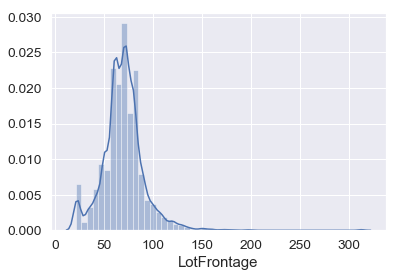

In [54]:
sns.distplot(df_merged.LotFrontage)

### Lot Area

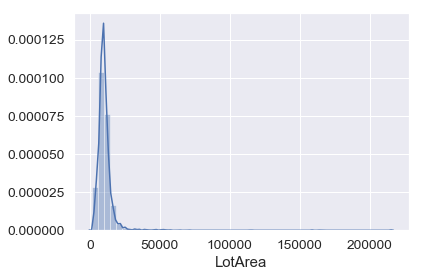

In [55]:
sns.distplot(df_merged.LotArea)

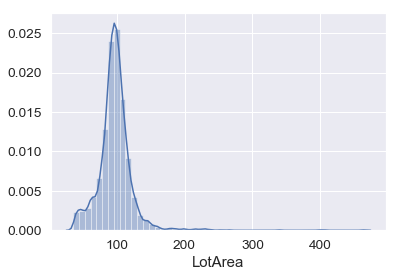

In [56]:
sns.distplot(np.sqrt(df_merged.LotArea))

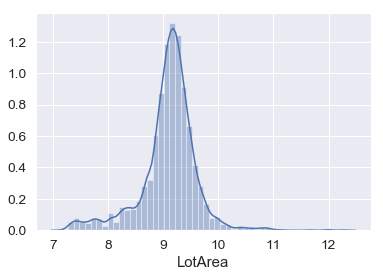

In [57]:
sns.distplot(np.log(df_merged.LotArea))

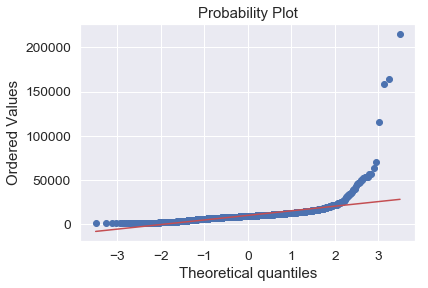

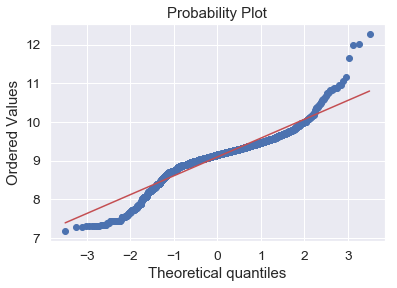

In [58]:
fig = plt.figure()
res = stats.probplot(df_merged['LotArea'], plot=plt)
plt.show()
fig = plt.figure()
res = stats.probplot(np.log(df_merged['LotArea']), plot=plt)
plt.show()

### Basement Realted Columns
BsmtExposure    82 <br>
BsmtCond        82 <br>
BsmtQual        81 <br>
BsmtFinType2    80 <br>
BsmtFinType1    79 <br>

and we also have other related columns: <br>
TotalBsmtSF <br>
BsmtUnfSF <br>
BsmtFullBath <br>
BsmtHalfBath <br>

In [59]:
cols = df_merged.filter(regex='Bsmt').columns
cols = cols.values
cols

array(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'], dtype=object)

In [60]:
# Fill in 0 if the TotalBsmtSF is null
idx = df_merged.TotalBsmtSF.isna()
df_merged.loc[idx, 'TotalBsmtSF'] = df_merged.loc[idx, 'TotalBsmtSF'].fillna(0.0)

In [61]:
# Find indexes of rows with missing Basement parameters
idx = ((df_merged.BsmtQual.isna()) & (df_merged.BsmtCond.isna()) & (df_merged.BsmtExposure.isna()) & \
                (df_merged.BsmtFinType1.isna()) & (df_merged.BsmtFinType2.isna()))

In [62]:
df_merged.loc[idx, cols].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [63]:
idx = (df_merged.TotalBsmtSF == 0.0)
str_cols = ['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2']
df_merged.loc[idx, str_cols] = df_merged.loc[idx, str_cols].apply(lambda x: x.fillna('NA'), axis=0)

In [64]:
idx = ((df_merged.TotalBsmtSF == 0) & ((df_merged.BsmtUnfSF.isna()) | (df_merged.BsmtFullBath.isna()) | \
                (df_merged.BsmtHalfBath.isna())))
num_cols = ['BsmtFinSF1','BsmtFinSF2','BsmtHalfBath','BsmtFullBath', 'BsmtUnfSF']
df_merged.loc[idx, num_cols] = df_merged.loc[idx, num_cols].apply(lambda x: x.fillna(0), axis=0)

In [65]:
df_merged.loc[:,cols][df_merged.loc[:,cols].isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0
948,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0
27,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
580,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0
725,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0
757,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0
758,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0
888,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1064,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,0.0,0.0


In [66]:
df_merged.BsmtQual.value_counts()
df_merged[df_merged.BsmtQual.isna()] = df_merged[df_merged.BsmtQual.isna()].fillna('TA')

In [67]:
df_merged.BsmtCond.value_counts()
df_merged[df_merged.BsmtCond.isna()] = df_merged[df_merged.BsmtCond.isna()].fillna('TA')

In [68]:
df_merged.BsmtExposure.value_counts()
df_merged[df_merged.BsmtExposure.isna()] = df_merged[df_merged.BsmtExposure.isna()].fillna('No')

In [69]:
df_merged.BsmtFinType2.value_counts()
df_merged[df_merged.BsmtFinType2.isna()] = df_merged[df_merged.BsmtFinType2.isna()].fillna('Unf')

In [70]:
mas_cols = ['MasVnrType', 'MasVnrArea']
df_merged[mas_cols][df_merged[mas_cols].isnull().any(axis=1)].head(10)

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
231,NaN,NaN
246,NaN,NaN


In [71]:
df_merged.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [72]:
idx = ( (df_merged.MasVnrType.isna()) & (df_merged.MasVnrArea > 0.0) )
df_merged.loc[idx, 'MasVnrType'] = df_merged.loc[idx, 'MasVnrType'].fillna('BrkFace')

In [73]:
idx = ( (df_merged.MasVnrType.isna()) & (df_merged.MasVnrArea.isna()) )
df_merged.loc[idx, 'MasVnrType'] = df_merged.loc[idx, 'MasVnrType'].fillna('None')
df_merged.loc[idx, 'MasVnrArea'] = df_merged.loc[idx, 'MasVnrArea'].fillna(0.0)

### Let's check what is still missing

In [74]:
null_list = get_null_list()
null_list

MSZoning       4
Functional     2
Utilities      2
SaleType       1
KitchenQual    1
Electrical     1
Exterior2nd    1
Exterior1st    1
dtype: int64

MSZoning Column <br>
4 missing

In [75]:
df_merged.MSZoning.value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

'RL' is the most common value so we can assume the missing values are RL.
We can also try later to reun the model with nulls and see the differance.

In [76]:
idx = df_merged.MSZoning.isna()
df_merged.loc[idx, 'MSZoning'] = df_merged.loc[idx, 'MSZoning'].fillna('RL')
df_merged.loc[idx]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,1916,30,RL,109.0,21780,Grvl,NA,Reg,Lvl,NaN,...,0,NA,NA,NA,0,3,2009,ConLD,Normal,0
756,2217,20,RL,80.0,14584,Pave,NA,Reg,Low,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Abnorml,0
790,2251,70,RL,60.0,56600,Pave,NA,IR1,Low,AllPub,...,0,NA,NA,NA,0,1,2008,WD,Normal,0
1444,2905,20,RL,125.0,31250,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2006,WD,Normal,0


In [77]:
df_merged.Functional.value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

Typ (Typical) is the most common value.
The data description file tells us we can assume Typical unless specified differently:
Functional: Home functionality (Assume typical unless deductions are warranted)
Hence, we will fill in Typ for the missing values.

In [78]:
df_merged[df_merged.Functional.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
756,2217,20,RL,80.0,14584,Pave,NA,Reg,Low,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Abnorml,0
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,9,2007,COD,Abnorml,0


In [79]:
col = 'Functional'
df_merged[col] = df_merged[col].fillna('Typ')

In [80]:
null_list = get_null_list()
null_list

Utilities      2
SaleType       1
KitchenQual    1
Electrical     1
Exterior2nd    1
Exterior1st    1
dtype: int64

#### Utilities Column

In [81]:
col = 'Utilities'
df_merged[df_merged[col].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,1916,30,RL,109.0,21780,Grvl,NA,Reg,Lvl,NaN,...,0,NA,NA,NA,0,3,2009,ConLD,Normal,0
485,1946,20,RL,64.0,31220,Pave,NA,IR1,Bnk,NaN,...,0,NA,NA,Shed,750,5,2008,WD,Normal,0


In [82]:
df_merged[col].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

'AllPub' is the most common value (99.99 percent)
All records are "AllPub", except for one "NoSeWa" and 2 missing values. Since the house with 'NoSewa' is in the test set (no price info), this feature won't help in predicting the price. We will drop it.

In [83]:
df_merged = df_merged.drop(col,  axis=1)

These columns: SaleType, KitchenQual, Electrical, Exterior2nd, Exterior1st
have 1 or 2 missing values so we will fill in with the most common value.

In [84]:
null_cols = ['SaleType', 'KitchenQual', 'Electrical', 'Exterior2nd', 'Exterior1st']
for col in null_cols:
    df_merged[col] = df_merged[col].fillna(df_merged[col].mode()[0])

No more missing data:

In [85]:
null_list = get_null_list()
null_list

Series([], dtype: int64)

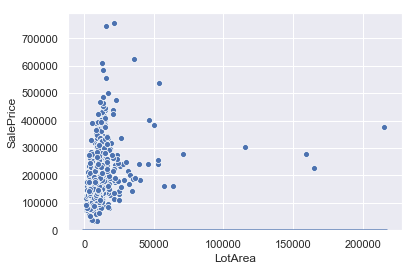

In [86]:
import seaborn as sns; sns.set()
# Sale Price and Lot Area pairplot
sns.distplot(df_merged[:train_len-100].LotArea)
ax = sns.scatterplot(x="LotArea", y="SalePrice", data=df_merged[:train_len])

In [87]:
# df_merged.LotArea[df_merged.LotArea > 100000] = (df_merged.LotArea[df_merged.LotArea > 100000] / 10)

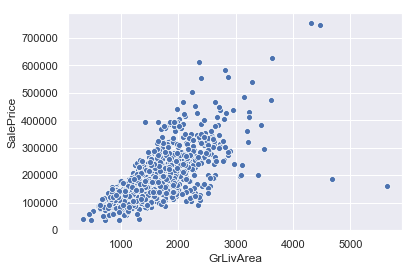

In [88]:
ax = sns.scatterplot(x="GrLivArea", y="SalePrice", data=df_merged[:train_len])

In [89]:
# Transform Nominal variables into dummies
df_merged = pd.get_dummies(df_merged)

# Feature Engineering

In [90]:
# Changing MSSubClass into a categorical variable
df_merged['MSSubClass'] = df_merged['MSSubClass'].astype(str)

# Changing OverallCond into a categorical variable
df_merged['OverallCond'] = df_merged['OverallCond'].astype(str)

# Year and month sold are transformed into categorical features.
df_merged['YrSold'] = df_merged['YrSold'].astype(str)
df_merged['MoSold'] = df_merged['MoSold'].astype(str)

### Adding Total Living Area column

In [91]:
cols = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtUnfSF','LowQualFinSF', 'TotLivArea']
df_merged['TotLivArea'] = df_merged['1stFlrSF'] + df_merged['2ndFlrSF'] + df_merged['TotalBsmtSF']
df_merged[cols].head(10)

,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtUnfSF,LowQualFinSF,TotLivArea
0,1710,856.0,856,854,150.0,0,2566.0
1,1262,1262.0,1262,0,284.0,0,2524.0
2,1786,920.0,920,866,434.0,0,2706.0
3,1717,756.0,961,756,540.0,0,2473.0
4,2198,1145.0,1145,1053,490.0,0,3343.0
5,1362,796.0,796,566,64.0,0,2158.0
6,1694,1686.0,1694,0,317.0,0,3380.0
7,2090,1107.0,1107,983,216.0,0,3197.0
8,1774,952.0,1022,752,952.0,0,2726.0
9,1077,991.0,1077,0,140.0,0,2068.0


#### 2.3. Exploratory data analytics


Data exploration is required to understand what is your data, and which preparations are required on it. A common visualization is a histogram. Use histogram to understand the values distribution, because many statistical model assume normal distribution.

In [92]:
if (not DEBUG_MODE):
    df_merged.hist(bins = 25, figsize = (20,15)) #Check the hist parameters by clicking on the Tab completion. 
    plt.show()

In [93]:
if (not DEBUG_MODE):
    df_merged.LotArea[df_merged['LotArea'] < 5000].hist(bins = 50, figsize = (10,5)) #Check the hist parameters by clicking on the Tab completion. 
    plt.show()

In [94]:
if (not DEBUG_MODE):
    display(df_merged.isnull().sum(),df_merged.isna().sum())

#### 2.4. Data manipulations

After we looked at the data we can prepare it to analysis. 

From understanding the histograms, and talking with experts we might decide to drop or change columns, or to split the data by rows. 

For example: 

...

An option that we will take here to handle this is:
1. Take out the few rows and put them aside for separate handling
2. Drop this predictor from data

(Note that after the data manipulation you can rerun the describe or histogram above to see changes)

Typically data scientists continue back and forth between diffrent data visualizations and manipulations, but for this exercise we will stop here. We will dive more to this on next lesson.

In [95]:
df_merged.describe()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotLivArea
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.00000
mean,1460.000000,69.542994,10168.114080,6.089072,1971.312778,1984.264474,101.396026,441.272011,49.565262,560.579993,...,0.081877,0.002398,0.865365,0.065091,0.004111,0.008222,0.015759,0.822885,0.083933,2547.48270
std,842.787043,21.703256,7886.996359,1.409947,30.291442,20.894344,178.854579,455.606014,169.179104,439.590889,...,0.274225,0.048920,0.341392,0.246728,0.063996,0.090317,0.124562,0.381832,0.277335,805.12084
min,1.000000,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.00000
25%,730.500000,60.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2000.00000
50%,1460.000000,70.000000,9453.000000,6.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2448.00000
75%,2189.500000,80.000000,11570.000000,7.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2991.50000
max,2919.000000,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11752.00000


In [96]:
df_merged.YrSold = df_merged.YrSold.astype(float)
df_merged.MoSold = df_merged.MoSold.astype(float)
df_merged['YearMonthSold'] = df_merged.YrSold * 10 + df_merged.MoSold

#### 2.5. Categorical values

Data manipulations require also handling of categorical data

#### 2.6. Transform the data to matrix of X and y, spliting to Train and Test

Let's now prepae to modeling:
1. Split between X the predictors and y the target
2. Turn from data frame to matrix
3. Split X and y to train data set and test data set, with matching indexes between X and y


The train_test_split is the first function we are using from sklearn.
Learn more about it function at: <br>
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 


sklearn handles numpy arrays, whereas until now we handled a dataframe.
Lets check that indeed we changed the type:

## Target Variable

SalePrice is the variable we decided to predict. So let's analyze this variable.
We plotted a graph of salePrice. Since target distribution is not normalized, we performed log-transformation. 


 mu = 180921.20 and sigma = 79415.29



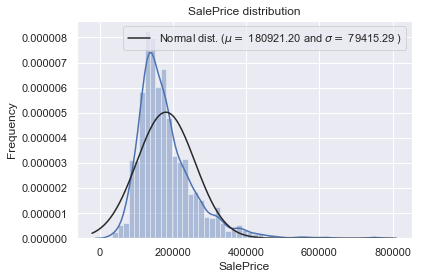

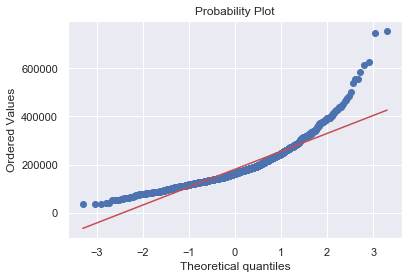


 mu = 12.02 and sigma = 0.40



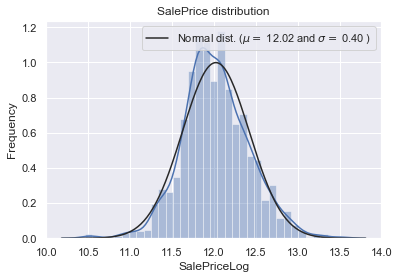

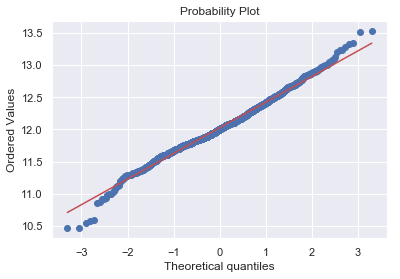

In [97]:
df_corr = df_merged[:train_len].copy()
df_corr['SalePrice'] = df.SalePrice.astype(int)
sns.distplot(df_corr['SalePrice'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_corr['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_corr['SalePrice'], plot=plt)
plt.show()

df_corr['SalePriceLog'] = np.log1p(df_corr['SalePrice'])
#Check the new distribution 
sns.distplot(df_corr['SalePriceLog'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_corr['SalePriceLog'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_corr['SalePriceLog'], plot=plt)
plt.show()

#### We see that we should  transform (log) the 'Sale Price'

In [98]:
df_merged['SalePriceLog'] = np.log1p(df_merged['SalePrice'])
df_merged = df_merged.drop('SalePrice', axis=1)

# Prepare Data for the Model

In [99]:
from sklearn.metrics import mean_squared_error

def calc_rmse(y_actual, y_predicted):
    rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
    return(rmse)

Split to train and test

In [100]:
# Prepare Train Data
train_df = df_merged[:train_len].copy()
X_train = train_df.drop(['Id', 'SalePriceLog'],axis=1).values
y_train = train_df['SalePriceLog'].values

### 3. Fit Models

We will start with the basic model of Linear Regression

### 3.1 Linear Regression Model

In [101]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

#### 3.2 Fit the selected model
Training the model, using sklearn, is typically only one command.

In [102]:
reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 4. Model evaluation

Evaluating the model can also be done in one command.

We can evalute the model that was trained on train_x by its prediction of test_x compared to test_y in one command. On next lessons we will learn more evaluation methods, as usually decision is taken by combined evaluation scores.

In [103]:
y_reg_pred = reg.predict(X_train)
calc_rmse(y_train, y_reg_pred)

0.09476113248483695

As we can see the evaluation on test was very good. Yet, model score on train is much higher. This may indicate that we might be in an overfit to the train data set.

# Second Model
### Gradient Boosting Regression (GBR)


In [104]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1,
                                   max_depth=8, max_features='sqrt',
                                   min_samples_leaf=10, min_samples_split=4, 
                                   loss='huber', random_state=42)

### Train the model

In [105]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

### Evaluate

In [106]:
y_gbr_pred = gbr.predict(X_train)
calc_rmse(y_train, y_gbr_pred)

0.04116056199420692

## Random Forrest

In [107]:
from sklearn.ensemble import RandomForestRegressor

rnf = RandomForestRegressor(n_estimators=500, max_depth=4, n_jobs=-1)
rnf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [108]:
y_rnf_pred = rnf.predict(X_train)
calc_rmse(y_train, y_rnf_pred)

0.15083892646764532

### Simple Stacked Models 

In [109]:
y_average = 0.5 * y_gbr_pred + 0.3 * y_rnf_pred +  + 0.2 * y_reg_pred
calc_rmse(y_train, y_average)

0.07072460307258907

y_pred = rnf.predict(X_test)
plt.figure(figsize=(10,10))
plt.subplot(1, 1, 1)
plt.scatter(y_test, y_pred, label = 'Predict')
plt.show

### 5. Predict / Deploy model

Predict on test data from Kaggle

In [110]:
df = df_merged[train_len:].copy()
X_pred = df.drop(['Id', 'SalePriceLog'],axis=1).values
y_pred = np.exp(0.5 * gbr.predict(X_pred) + 0.3 * rnf.predict(X_pred) +  0.2 * reg.predict(X_pred))

In [111]:
kaggle_df = pd.DataFrame()
kaggle_df['Id'] = df_merged.Id[train_len:]
kaggle_df['SalePrice'] = y_pred
kaggle_df.to_csv('Prediction.csv', index=False)

### 6. Communicate
Now that you have a good working model you need to communicate your results.

If this is a predict project, you may decide not to communicate details externaly, only your evaluation results.

You need to communicate how you got to the results, to customers on infer project, and internaly on predict project. 

In [112]:
tmp = df_merged.iloc[:train_len].copy()
df_hb = tmp[tmp.HalfBath > 0].copy()
df_hb['HalfBath'] = df_hb['HalfBath'] - 1 
df_hb['FullBath'] = df_hb['FullBath'] + 1 
X = df_hb.drop(['Id', 'SalePriceLog'],axis=1).values
y_hb = np.exp(gbr.predict(X))

Calculate the price differance and plot the distribution

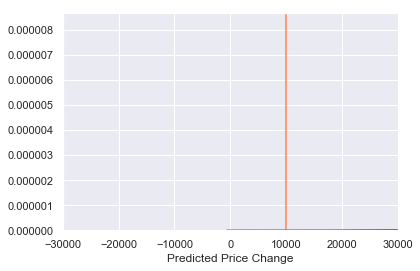

In [113]:
diff =  y_hb - df_hb['SalePriceLog']

limit = 30000
plt.xlim(-limit, limit)
plt.axvline(10000, color='coral')
sns.distplot(diff ,color="teal", axlabel="Predicted Price Change")

### Feature Score (GBR)

In [114]:
feature_score = gbr.feature_importances_
feature_names = df_merged.drop(['Id', 'SalePriceLog'], axis=1).columns
df_feature_score = pd.DataFrame(data=feature_names, columns=["Feature"])
df_feature_score["score"] = feature_score
df_feature_score = df_feature_score.sort_values(by=['score'], ascending=False)

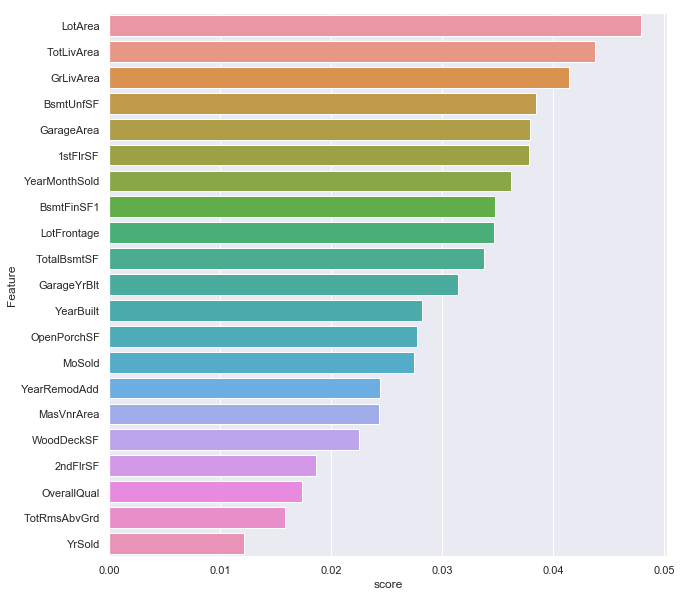

In [115]:
plt.figure(figsize = (10,10))
sns.barplot(y="Feature", x="score", data=df_feature_score.head(21))
features = df_feature_score[df_feature_score.score > 0.01]

In [116]:
features

,Feature,score
2,LotArea,0.047883
301,TotLivArea,0.043729
15,GrLivArea,0.041407
10,BsmtUnfSF,0.038405
26,GarageArea,0.037916
12,1stFlrSF,0.037797
302,YearMonthSold,0.036156
8,BsmtFinSF1,0.034715
1,LotFrontage,0.034647
11,TotalBsmtSF,0.033774


### Feature Score (RF)

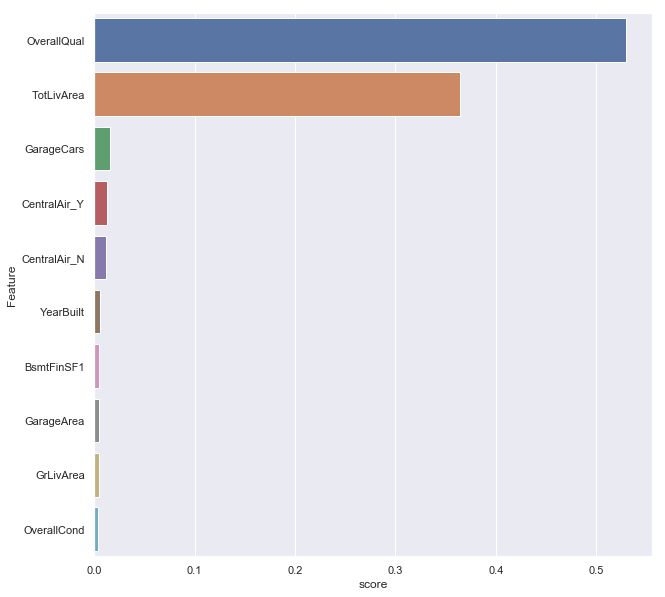

In [117]:
feature_score = rnf.feature_importances_
feature_names = df_merged.drop(['Id','SalePriceLog'], axis=1).columns
df_feature_score = pd.DataFrame(data=feature_names, columns=["Feature"])
df_feature_score["score"]= feature_score
df_feature_score = df_feature_score.sort_values(by=['score'], ascending=False)
plt.figure(figsize = (10,10))
sns.barplot(y="Feature", x="score", data=df_feature_score.head(10))
features = features.append(df_feature_score[df_feature_score.score > 0.01])

In [118]:
df_feature_score.head(10)

,Feature,score
3,OverallQual,0.529350
301,TotLivArea,0.364331
25,GarageCars,0.016152
222,CentralAir_Y,0.012923
221,CentralAir_N,0.011547
5,YearBuilt,0.005904
8,BsmtFinSF1,0.004517
26,GarageArea,0.004446
15,GrLivArea,0.004305
4,OverallCond,0.003746


In [119]:
features

,Feature,score
2,LotArea,0.047883
301,TotLivArea,0.043729
15,GrLivArea,0.041407
10,BsmtUnfSF,0.038405
26,GarageArea,0.037916
12,1stFlrSF,0.037797
302,YearMonthSold,0.036156
8,BsmtFinSF1,0.034715
1,LotFrontage,0.034647
11,TotalBsmtSF,0.033774


In [120]:
# Prepare Train Data
train_df = df_merged[:train_len].copy()
X_train = train_df[features.Feature].values
y_train = train_df['SalePriceLog'].values

In [121]:
gbr.fit(X_train, y_train)
y_gbr_pred = gbr.predict(X_train)
calc_rmse(y_train, y_gbr_pred)

0.04243931359687589

In [122]:
rnf.fit(X_train, y_train)
y_rnf_pred = rnf.predict(X_train)
calc_rmse(y_train, y_rnf_pred)

0.15289158828109392

In [ ]:
### Remove some dependant features

In [142]:
less_features = features.drop(features.Feature.isin(['GrLivArea','1stFlrSF', '2ndFlrSF','BsmtFinSF1','TotalBsmtSF', 'YrSold', 'MoSold', 'CentralAir_N']))

In [143]:
X_train = train_df[less_features.Feature].values
y_train = train_df['SalePriceLog'].values

In [144]:
gbr.fit(X_train, y_train)
y_gbr_pred = gbr.predict(X_train)
calc_rmse(y_train, y_gbr_pred)

0.04562235133463525

In [145]:
rnf.fit(X_train, y_train)
y_rnf_pred = rnf.predict(X_train)
calc_rmse(y_train, y_rnf_pred)

0.15315972795400146